# Option Basics and the Black-Scholes-Merton Model

**Table of Contents**
 * [Simple derivatives](#section_derivatives)
    * [Forwards](#subsection_forwards)
    * [Call Options](#subsection_calls)
    * [Put Options](#subsection_puts)
 * [Relationship of Forward, Call and Put prices](#section_parity)
 * [The Black-Scholes-Merton formula](#section_bsm)
 * [Greeks](#section_greeks)
 * [*Homework](#section_homework)

# Simple derivatives <a class="anchor" id="section_derivatives"></a>

#### Recap Discounting

Why do we use discounting?

<br>

If we have \\$100 dollars, we can do the followings:
- put it in the freezer, so at any time, we can defrost it and have \\$100.
- invest in Treasury Bonds, which gives us $r$ coupon per annum, so we'll have \\$100 + \\$$\frac{r}{100}$ one year from now

<br>

So, if we lend money, we should always think about that investing the same amount would generate us income, and if the investment is riskless, this income is guaranteed.

That is why money has a *time value*.

Let assume $r$ is the risk-free interest rate, at which money is borrowed or lent with no credit risk, so the money is certain to be paid.
This is a theoretical rate, only proxies can be found in real life. But in theory, this is the minimum return an investor expects from any investment.

A good proxy could be the US Treasury bond rate. <br>
Check: https://www.marketwatch.com/investing/bond/tmubmusd01y?countryCode=BX

<img src="images/us_rate.PNG" width="300"/>

We have $N$ amount of money to invest for $t$ years, then our payoff depends on the compounding frequency:

<table>
  <tr>
    <th>Nominal interest</th>
    <th></th>
    <th>Investing the money every year</th>
    <th></th>
    <th>Investing the money $m$ times a year</th>
    <th></th>
    <th>Investing the money continuously</th>
  </tr>
  <tr>
    <td>
        \begin{equation}
            N \cdot (1 + r t)
        \end{equation}
    </td>
    <td></td>
    <td>
        \begin{equation}
            N \cdot (1 + r)^t
        \end{equation}
    </td>
    <td></td>
    <td>
        \begin{equation}
            N \cdot \left( 1 + \frac{r}{m}\right)^{m t}
        \end{equation}
    </td>
    <td></td>
    <td>
        \begin{equation}
            N \cdot e^{r t}
        \end{equation}
    </td>
  </tr>
</table>

<br>

$N$ is called the **present value** of our investment, while $N \cdot e^{r t}$ is the **future value**.

I.e. the price of a bond which pays $n$ cashflows during its life has a present value of
\begin{equation}
PV = \sum_{i=1}^n C_i \cdot e^{-r_i t_i},
\end{equation}
where $C_i$ denotes the cashflow received at time $t_i$.


## Forwards <a class="anchor" id="subsection_forwards"></a>

**Spot contract**
: an agreement to buy or sell an asset, e.g. a stock almost immediately. Its price is called **spot price**, and we refer to it as $S_0$

$S_t$ is the spot price of the underlying at time $t$.

<br>

**Forward contract**
: an agreement to buy or sell an asset at a certain future time for a certain price. This date when the sale is made is called **maturity** (or expiry) of the contract, and it is denoted by $T$. <br>

<br>

One of the parties assumes a **long position** of the forward contract and agrees to buy the underlying asset on that future date for the predefined price, and the other party assumes a **short position** and agrees to sell the asset on the same date for the same price.

### What is the payoff of this forward contract?

The **payoff** from a long position on one unit of an asset is
\begin{equation}
S_T - K
\end{equation}
where $K$ is the delivery price. It means that the buyer pays $K$ for the asset, and then receives the asset itself, which worth $S_T$ at that time. This amount can be either positive or negative, depending on the price of the asset at $T$.

Similarly, the payoff from a short position on one unit of an asset is
\begin{equation}
K - S_T
\end{equation}

In [17]:
import matplotlib.pyplot as plt
from matplotlib import rcParams # detailed parameter setting
""" more details on customization: https://matplotlib.org/stable/tutorials/introductory/customizing.html """
from typing import Dict, List, Union


# some type hints in the header of the function
def my_plotter(x: List[float], y: Union[List[float], List[List[float]]], layout: Dict = {}, names: List[str] = None) -> None:
    """ inline for loop is called 'list comprehension' """
    y = [y] if all(isinstance(item, float) for item in y) else y
    
    plt.figure(figsize=(8, 4))
    lines = []
    show_legend = True if names is not None else False
    # show_legend = True if names else False  -> here is fine, but be cautious bc 0, empty str and empty list will be evaulated to False

    """ setup some basic key-word arguments for plot line """
    plot_kwargs = {
        'linestyle': 'solid',
        'linewidth': 4
    }
    if names is not None:
        show_legend = True
        if len(names) != len(y):
            raise ValueError("Length of names is not matching with number of plotted y lists.")

    """ 'enumerate' add a counter to the loop """
    for i, y_item in enumerate(y):
        if show_legend:
            plot_kwargs['label'] = names[i]
        _line = plt.plot(x, y_item, **plot_kwargs)
        lines.append(_line)

    if show_legend:
        plt.legend(fontsize=16)
    if 'title' in layout:
        plt.title(layout['title'], fontsize=20)
        rcParams['axes.titlepad'] = 30 # moving the title a little further away from the plot
    if 'x_label' in layout:
        plt.xlabel(layout['x_label'], fontsize=16)
        rcParams['axes.labelpad'] = 20 # moving the ax label a little further away from the plot

    """ enhance axes """
    ax = plt.gca() # gca: get current axes
    ax.axhline(linestyle='--', color='black', linewidth=1)
    plt.show()


In [19]:
import numpy as np

strike = 100
step_size = 0.001

x_stock_price = np.arange(0, 2 * strike, step_size)
y_forward_payoff = np.array([x - strike for x in x_stock_price])

y_forward_payoff__short = y_forward_payoff * (-1)
y_forward_payoff__short

array([100.   ,  99.999,  99.998, ..., -99.997, -99.998, -99.999])

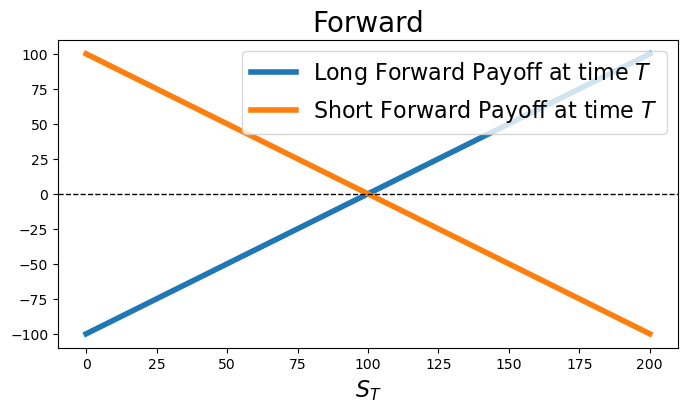

In [21]:
layout = {'title': 'Forward', 'x_label': '$S_{T}$'}
my_plotter(x_stock_price, [y_forward_payoff, y_forward_payoff__short], layout=layout, names=['Long Forward Payoff at time $T$', 'Short Forward Payoff at time $T$'])

### What is the value of this forward contract at time $t$?

Let's imagine that at time 0, we enter into a forward contract to buy a stock for $K$ at time $T$. The payoff of this at time $T$ is
\begin{equation}
f(T, S_T) = S_T - K
\end{equation}

This is a portfolio of a stock and money. The same portfolio at time 0 would worth $ S_0 - e^{-rT} \cdot K$, and during the lifetime of the contract at any time $t$, the **value of the forward contract** would be 
\begin{equation}
f(t, S_t) = S_t - e^{-r(T-t)} \cdot K
\end{equation}

### What is the strike/delivery price of this forward contract?

As a market standard, $K$ strike is choosen to eliminate any cashflow at time 0. 
It means that $K$ is chosen to  satisfy $S_0 - e^{-rT} \cdot K = 0$, thus:
\begin{equation}
K = S_0 \cdot e^{rT}
\end{equation}


### What if the price of this portfolio does not satisfy this?

Let's assume that $K < S_0 \cdot e^{rT}$.

At time 0, you enter into this forward contract to buy a stock for $K$ at time $T$. At the same time, you can sell a stock for $S_0$ and lend this money with $r$ interest rate to someone till time $T$. In sum, this cost nothing to you. Then at time $T$, the borrower repays you the loan and its interest $S_0\cdot e^{rT}$ and because of the forward contract, you can buy the stock for $K$. This leads to a riskless profit of $S_0\cdot e^{rT} - K > 0$.

<br>

This is called an **arbitrage** opportunity on the market.

<br>

**Arbitrage**
: taking advantage of difference in prices in two or more markets, which is considered as a riskless profit. I.e. taking a position in the market which has zero net cost, and guarantees no losses in the future and some chance to make profit.


## Call Options <a class="anchor" id="subsection_calls"></a>

**Call option**
: gives the option holder the right to *buy* the underlying asset by a certain date for a certain price. This predefined price for sale is called **strike price**. The option seller on the other hand must *sell* the underlying if the option is exercised.

The date when the option is exercised can be very different depending on the style of the trade. The simplest construction is called **European call option**, when the option can be exercised only on a predefined date, which is called the **maturity** (or exercise date) of the option.

IMPORTANT: the holder does not have to exercise the option, only if he/she wants.

### What is the benefit of this construction?

Let's assume that, we received a call option as a gift which says if we want, we can buy a stock of Abracadabra Inc. for \\$100 one year from now. <br>
Let's think through the following scenarios:

- Scenario A: the price of the stock rises to $120 in a year

- Scenario B: the price of the stock falls to $90 in a year


<details>
 <summary>How to imagine?</summary>
In Scenario A, if we exercise the option and buy a stock for \$100, we can earn \$20 by selling the stock immediately. In Scenario B, either we buy the stock for \$100 from the option seller or buy it on the market for \$90. In this case, if we exercise the option, we'll technically lose \$10.

Since the call option is not a forward contract, we can decide to not buy the stock in Scenario B to lose money, which is a clear benefit.

Let's think from the seller's point of view. In Scenario B, nothing will happen, but in Scenario A, they would lose money because they have to sell the stock for \$100 instead of 120 on the market. This means that the option seller takes the risk to lose money, for which they can claim a price when they sell the option. Let's denote this **call option price** with $c$.
</details>

### What is the payoff of this call option contract?

The payoff of the call option is 
\begin{equation}
max\lbrace S_T - K, 0\rbrace
\end{equation}

In [30]:
# strike and step_size is the same as before
call_price = 5
y_call_payoff = [ 0.0 if x < strike else x - strike for x in x_stock_price]
y_call_net_profit = [ y - call_price for y in y_call_payoff]

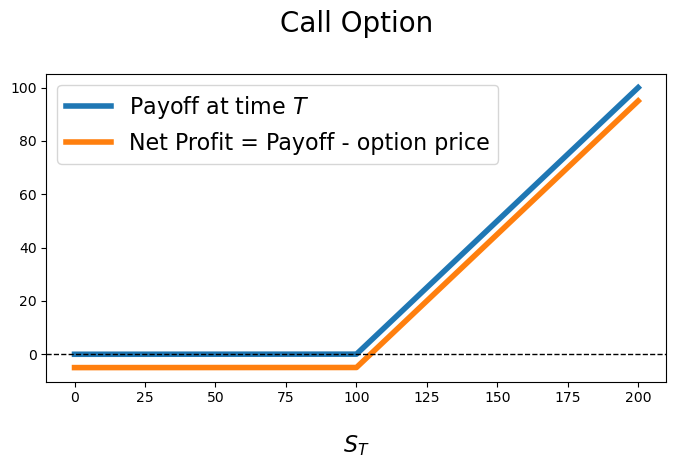

In [32]:
layout = {'title': 'Call Option', 'x_label': '$S_{T}$'}
my_plotter(x_stock_price, [y_call_payoff, y_call_net_profit], layout=layout, names=['Payoff at time $T$', 'Net Profit = Payoff - option price'])

## Put Options <a class="anchor" id="subsection_puts"></a>

**Put option**
: gives the option holder the right to *sell* the underlying asset by a certain date for a certain price. Similarly, to the call option, this predefined price is called **strike price**. The option seller on the other hand must *buy* the underlying if the option is exercised.

Analogously, a **European put option** can be only exercised on the maturity date of the option.

### What is the benefit of this construction?

The option seller takes risk with a put option as well, so they will claim a price for it. Let's denote this **put option price** with $p$.

Let's assume that we just bought an Abracadabra Inc. stock from the market which worth \\$100 now, and we bought a put option which says we'll have the chance to sell the stock for \\$100 one year from now. <br>
Let's think through the same scenarios:

- Scenario A: the price of the stock rises to $120 in a year

- Scenario B: the price of the stock falls to $90 in a year


<details>
 <summary>How to imagine?</summary>
In Scenario A, we should not exercise our option, since we would sell our stock for \$100 instead of \$120 market price. In contract, in Scenario B,
we can sell our stock to the option seller for higher price than the market price. We can even buy the predefined amount of stocks on the market at time $T$ for \$90 /unit, exercise the option and sell them to the option seller for \$100.

Put options also act as something like an insurance, to floor your loss if the stock price falls significantly.
</details>

### What is the payoff of this put option contract?
The payoff of the put option is 
\begin{equation}
max\lbrace K - S_T, 0\rbrace
\end{equation}

In [34]:
# strike and step_size is the same as before
put_price = 8
y_put_payoff = np.array([ 0.0 if x > strike else strike - x for x in x_stock_price])
y_put_net_profit = np.array([ y - call_price for y in y_put_payoff])

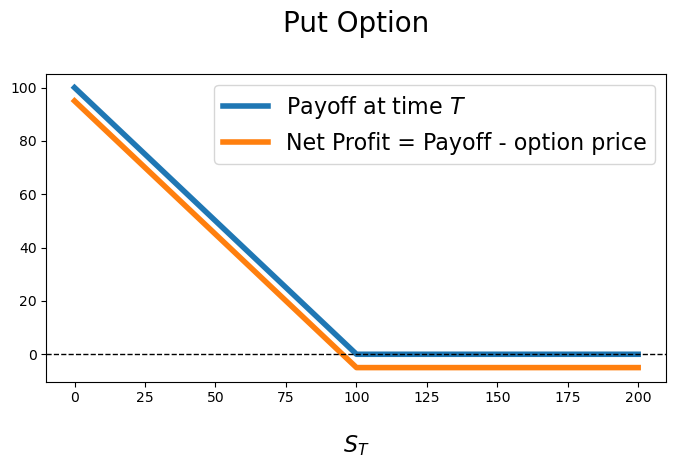

In [36]:
layout = {'title': 'Put Option', 'x_label': '$S_{T}$'}
my_plotter(x_stock_price, [y_put_payoff, y_put_net_profit], layout=layout, names=['Payoff at time $T$', 'Net Profit = Payoff - option price'])

### Summary

- Buying a option ends in $\geq$ 0 profit, while selling it generate $\leq$ 0
- Call options gain on rising stock prices, while put options gain on dropping stock prices

<table>
  <tr>
    <th></th>
    <th>CALL option</th>
    <th></th>
    <th>PUT option</th>
  </tr>
  <tr>
    <td>
        <b>OPTION HOLDER (LONG POSITION)</b>
    </td>
    <td> <img src="images/long_call.PNG" width="300"/> </td>
    <td></td>
    <td> <img src="images/long_put.PNG" width="300"/> </td>
  </tr>
  <tr>
    <td>
        <b>OPTION SELLER (SHORT POSITION)</b>
    </td>
    <td> <img src="images/short_call.PNG" width="300"/> </td>
    <td></td>
    <td> <img src="images/short_put.PNG" width="300"/> </td>
  </tr>
</table>

# Relationship of Forward, Call and Put prices <a class="anchor" id="section_parity"></a>

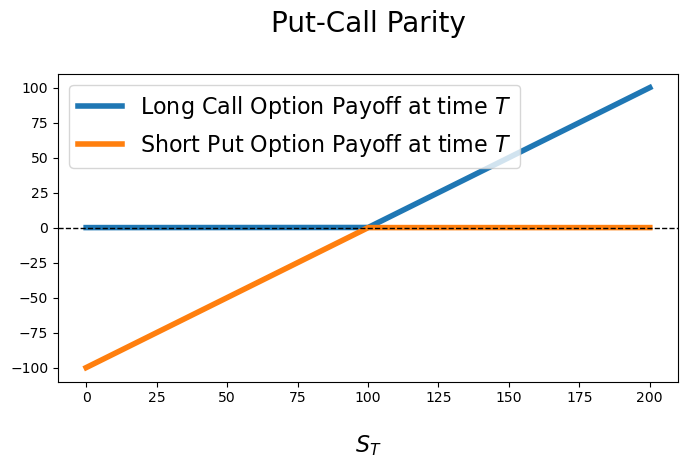

In [38]:
layout = {'title': 'Put-Call Parity', 'x_label': '$S_{T}$'}

my_plotter(x_stock_price, [y_call_payoff, y_put_payoff * (-1)], layout=layout,
           names=['Long Call Option Payoff at time $T$', 'Short Put Option Payoff at time $T$'])

The previous plots shows that a long call plus a short put option payoff is the same as a long forward payoff.

This implies an important formula which is called the **Put-Call Parity**: for any $ 0 \leq t \leq T$:
\begin{equation}
c_t - p_t = S_t - K\cdot e^{-r\cdot(T-t)}
\end{equation}

This means that we can deduce the price of the put from the price of the call with the same strike price and maturity date, and vica versa.

# The Black-Scholes-Merton formula <a class="anchor" id="section_bsm"></a>

<details>
 <summary>A little history</summary>
The model was invented around 1973, and had a huge influence on the way that traders price and hedge derivatives. It estimates the theoretical price of derivatives based on other investment instruments, taking into account the impact of different risk factors such as interest rates and market volatility.

The contribution of Merton and Scholes was awarded with a Nobel prize of Economics in 1997. Sadly, Black died before to earn this award.
</details>


#### Assumptions

- underlying stock price follows a geometric Brownian Motion
  \begin{equation}
      \begin{cases}
          dS_t = \mu S_t \, dt + \sigma S_t \, dW_t, \quad t \in [0,T], \\
          S_0 = s_0 .
      \end{cases}
  \end{equation}
- the $r$ risk-free interest rate is constant over time and identical for all expiries, and money can be borrowed or lent at any time at this rate
- no arbitrage opportunities are present on the market
- trading is open continuously, and we can buy any partial amounts
- stocks pays no dividend, i.e. no cash payment comes from the stock
- no transaction costs are issued (e.g. taxes or fees)

Let's define $f(t, S_t)$ as the price of the derivative.

As stated by Itô's lemma,
\begin{equation}
df = f'_t dt + f'_S \cdot \mu S_t dt + f'_S \cdot \sigma S_t dW_t + \frac{1}{2}\cdot f''_{SS} \sigma^2 S_t^2 dt
\end{equation}

One important note is that the Wiener process under $S$ and $f$ are the same, which allows use to create a portfolio of the derivative and its underlying and eliminate the Wiener process.

The elimination of $W_t$ means that the portfolio is riskless (but only for a short amount of time).

\begin{equation}
    dS_t = \mu S_t dt + \color{red}{\sigma S_t dW_t} \quad
\end{equation}
\begin{equation}
df = f'_t dt + f'_S \cdot \mu S_t dt + \color{red}{f'_S \cdot \sigma S_t dW_t} + \frac{1}{2}\cdot f''_{SS} \sigma^2 S_t^2 dt
\end{equation}

Thus one unit of short position from the derivative and $f'_S$ amount of stock position gives us the riskless portfolio: 
\begin{equation}
\Pi := -f + f'_S \cdot S
\end{equation}


In differential form, by substituting $df$ and $dS_t$, we get:
\begin{equation}
d\Pi = -f'_t dt - \frac{1}{2} f''_{SS} \cdot \sigma^2 S_t^2 dt
\end{equation}


If this portfolio is riskless, then it earns the risk-free interest rate which means
\begin{equation}
d\Pi = r\Pi dt
\end{equation}

Using the two equations, we get a non-stochastic PDE:
\begin{equation}
-f'_t dt - \frac{1}{2} f''_{SS} \cdot \sigma^2 S_t^2 dt = -r \cdot f + r\cdot f'_S \cdot S_t
\end{equation}
which is called the **Black-Scholes-Merton differential equation** of derivative pricing.


The price of each derivative which depends on a non-dividend-paying stock must satisfy this formula, otherwise arbitrage opportunities will appear on the market.

Since the portfolio is riskless on for a short period of time, the amount $f'_S$ must be recalculated frequently, which is called rebalancing of the portfolio. In particular, $f'_S$ is called the **delta** of the option, in other words, the sensitivity of the option price with respect to the price of the underlying asset.

To solve the above PDE, we need to have boundary conditions, which specify the values of the derivative at the boundaries of possible values of $S$ and $t$.

For example, if we would like to price a European call option, we know the payoff at time $T$, which leads to the condition of
\begin{equation}
f = max(S_T - K, 0)
\end{equation}

By solving the PDE for the call option, we end up with the following which is called **Black-Scholes-Merton formula** of European call option:

\begin{equation}
c = S_0 \cdot N(d_1) - K\cdot e^{-rT} \cdot N(d_2)
\end{equation}
where $N(\cdot)$ is the cumulative distribution function of the standard normal distribution, and
\begin{equation}
d_1 = \frac{log(S_0 / K) + (r + \sigma^2 / 2)T}{\sigma\sqrt{T}}  \quad \text{ and } \quad d_2 = d_1 - \sigma\sqrt{T}.
\end{equation}

### Approximate $N(\cdot)$ in Python

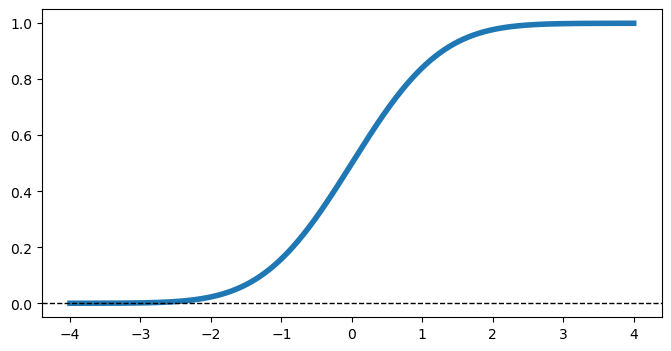

In [40]:
from scipy.stats import norm
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

x = np.linspace(-4, 4, 1000)
y = norm.cdf(x)

my_plotter(x, y)

Another way of estimating $N(\cdot)$ is using the *Gauss error function* (called erf), which has teh following interpretaion:
for a random variable $\mathcal{Y}$ which is normally distributed with mean 0 and standard deviation $\dfrac{1}{\sqrt{2}}$, $erf(x)$ is the probability that $\mathcal{Y}$ falls into the range $[-x, x]$.

\begin{equation}
erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}dt
\end{equation}

So then:
\begin{equation}
\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-t^2/2}dt = \frac{1}{2} \left[ 1 + erf\left(\frac{x}{\sqrt{2}} \right) \right]
\end{equation}

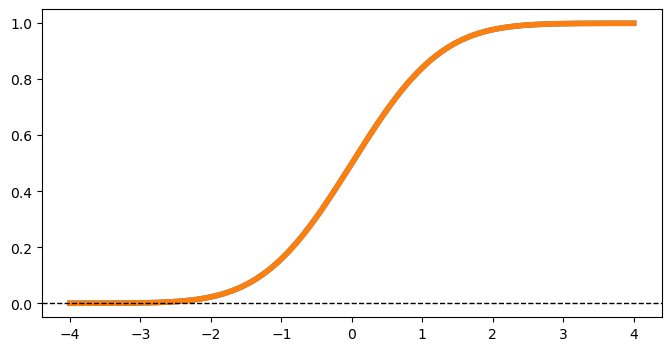

In [42]:
from scipy.special import erf
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html

x = np.linspace(-4, 4, 1000)
# numpy vectorizes the calculaction
y_erf = 0.5 * (1.0 + erf(x / np.sqrt(2)))

# plotting both results
my_plotter(x, [y, y_erf])

### Create our own pricer

In [44]:
"""The pricing function of European call option"""
def black_scholes_eur_call(r: float, T: float, S0: float, sigma: float, K: Union[float, List[float], np.ndarray]) -> np.ndarray:
    """
    Black-Scholes pricer of European call option on non-dividend-paying stock

    param r: risk-free interest rate (which is constant)
    param T: time to maturity (in years)
    param S0: initial spot price of the underlying stock
    param sigma: volatility of the underlying stock
    param K: strike price (or prices)
    """
    # check conditions
    assert sigma > 0

    K = np.array([K]) if isinstance(K, float) else np.array(K)

    d1_vec = ( np.log( S0 / K ) + ( r + 0.5 * sigma**2 ) * T ) / ( sigma * T**0.5 )
    d2_vec = d1_vec - sigma * T**0.5

    N_d1_vec = norm.cdf(d1_vec)
    N_d2_vec = norm.cdf(d2_vec)

    return N_d1_vec * S0 - K_vec * np.exp((-1.0)*r*T) * N_d2_vec


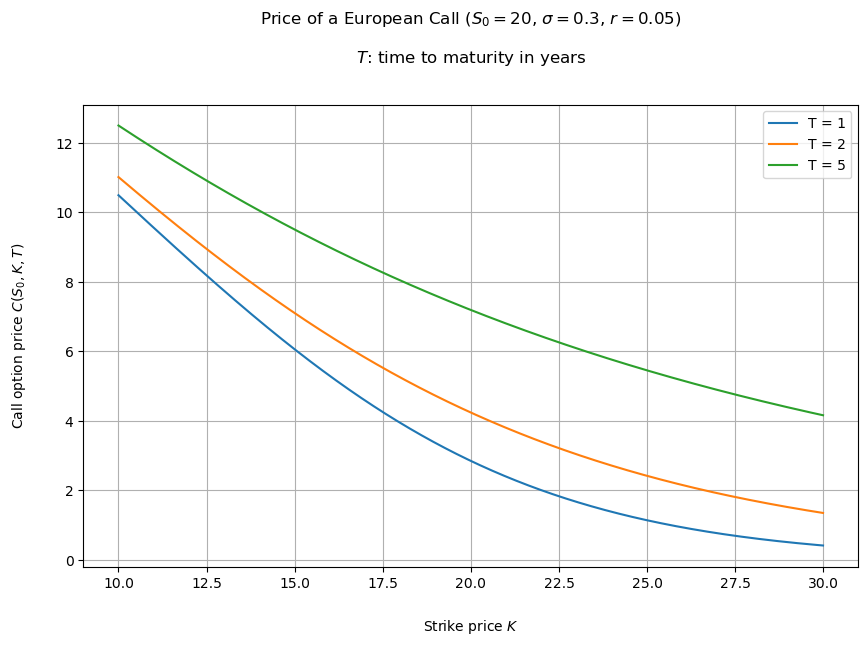

In [52]:
# Strike prices for which the option price is calculated
K_vec = np.arange(10, 30, 0.01)

# Time to maturities (in year fractions)
T_vec = [1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(black_scholes_eur_call(r=0.05, T=_T, S0=20.0, sigma=0.3, K=K_vec))

plt.figure(figsize=(10, 6))

for prices, T in zip(prices_to_plot, T_vec):
    plt.plot(K_vec, prices, label=f"T = {int(T)}")

plt.title(
    'Price of a European Call ($S_0 = 20$, $\\sigma = 0.3$, $r = 0.05$)\n\n'
    '$T$: time to maturity in years'
)

plt.xlabel('Strike price $K$')
plt.ylabel('Call option price $C(S_0,K,T)$')

plt.legend()
plt.grid(True)
plt.show()


# Greeks <a class="anchor" id="section_greeks"></a>

The price of a derivative product depends on many variables, e.g. $T$, $S_T$, $K$, $\sigma$ ... When we check the price differences with respect to these variables, we can measure different dimensions of the risk in the derivative, so we'll get some feeling how sensitivite is the product to different market movements.
These variables which drive the risk are called **risk factors**, and the rate of change with respect to these variables (i.e. partial derivatives) are called the **greeks**.

We already discussed **delta** which is the sensitivity to the underlying stock price.
\begin{equation}
\Delta = c'_S
\end{equation}

**Vega** measures the sensitivity to the volatility of the underlying asset.
\begin{equation}
\mathcal{V} = c'_\sigma
\end{equation}

**Theta** measures the sensitivity to the passage of time, i.e. time decay.
\begin{equation}
\Theta = c'_\tau
\end{equation}

**Rho** measures the sensitivity to the risk-free interest rate.
\begin{equation}
\rho = c'_r
\end{equation}

**Gamma** is a second-order greek, it measure the rate of change in delta with respect to the underlying price.
\begin{equation}
\Gamma = \Delta'_S = c''_{SS}
\end{equation}

It can be shown that delta is actually $N(d_1)$ for the European call option (by derivating the call option price formula):
\begin{equation}
c = S_0 \cdot \color{red}{N(d_1)} - K\cdot e^{-rT} \cdot N(d_2)
\end{equation}
\begin{equation}
d_1 = \frac{log(S_0 / K) + (r + \sigma^2 / 2)T}{\sigma\sqrt{T}}  \quad \text{ and } \quad d_2 = d_1 - \sigma\sqrt{T}.
\end{equation}

By derivating the BSM pricing formula of European call, we can get analytical solutions for these derivatives of the call option price:

<table>
    <tr>
        <th>Greek</th><th>Formula for call option</th>
    </tr>
    <tr>
        <td>
            \begin{equation}
                \Delta = c'_S
            \end{equation} 
        </td>
        <td>
            \begin{equation}
                N(d_1)
            \end{equation} 
        </td>
    </tr>
    <tr>
        <td>
            \begin{equation}
                \mathcal{V} = c'_\sigma
            \end{equation}
        </td>
        <td>
            \begin{equation}
                S_t \cdot N'_\sigma(d_1) \cdot\sqrt{T-t}
            \end{equation} 
        </td>
    </tr>
    <tr>
        <td>
            \begin{equation}
                \Theta = c'_\tau
            \end{equation}
        </td>
        <td>
            \begin{equation}
                -S_t \cdot N'_t(d_1)\cdot \frac{\sigma}{2\sqrt{T-t}} - r\cdot K\cdot e^{-r(T-t)}\cdot N(d_2)
            \end{equation} 
        </td>
    </tr>
    <tr>
        <td>
            \begin{equation}
                \rho = c'_r
            \end{equation}
        </td>
        <td>
            \begin{equation}
                K\cdot (T-t)\cdot e^{-r(T-t)}\cdot N(d_2)
            \end{equation} 
        </td>
    </tr>
    <tr>
        <td>
            \begin{equation}
                \Gamma = \Delta'_S = c''_{SS}
            \end{equation}
        </td>
        <td>
            \begin{equation}
                N'_S(d_1) \cdot \frac{1}{S_t\cdot\sigma\sqrt{T-t}}
            \end{equation} 
        </td>
    </tr>
</table>

where $N$ is the cummulative distribution function and $N'$ is the probability density function of the standard normal distribution, and
\begin{equation}
d_1 = \frac{log(S_0 / K) + (r + \sigma^2 / 2)T}{\sigma\sqrt{T}}  \quad \text{ and } \quad d_2 = d_1 - \sigma\sqrt{T}.
\end{equation}

# Homework <a class="anchor" id="section_homework"></a>

**HW 2/1**: <br>
Smart up our plotter to be able to customize the hard-coded layout setup inside the function. Add more custom feature that you would like to use.

**HW 2/2**: <br>
Upgrade the BSM call option pricer to be able to return the greeks as well, not just the price.

**HW 2/3**: <br>
Implement the BSM pricer for European put option.

**HW 2/4**: <br>
With the call and put pricer, check if Put-Call parity holds in practice.